#**The perception of textual, visual, and auditory data and their influence on choices**

By: Nidhi Srinath

The goal of this notebook is to import necessary packages and load the required datasets into the notebook. Further, the data will be processed to find insights about the quality of the features and to understand what modeling process would work best with them. The dataset can be found using [this link](https://osf.io/6nwky) and the reference paper can be [found here.](https://doi.org/10.1177/0956797617713798)

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Packages
from scipy import stats

# Regression models
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

For this project, I will be using the humanizing voice dataset.

In [2]:
# Importing the dataset
df = pd.read_csv('Schroeder_reduced.csv')
df.head()

,participant_number,communication_medium,communicator_candidate,agree_with_communicator,own_political_views,human_uniqueness_scale,human_nature_scale,gender,age
0,1,1,3,1,2,1.17,1.17,2,33
1,2,1,1,0,3,0.00,0.00,2,30
2,3,3,1,0,0,1.17,-0.50,1,18
3,4,4,1,0,2,0.33,0.17,1,25
4,5,4,3,1,2,0.17,-0.17,1,26


The dataset contains the following columns:
- communication_medium flag which indicates the communication mode. (1 = audiovisual, 2 = audio, 3 = transcript, 4 = written)
- communicator_candidate is the candidate of choice of the communicator (1 = Kasich, 2 = Trump, 3 = Sanders, 4 = Clinton)
- agree_with_communicator (1 = agree, 0 = disagree)
- own_political_views (1 = Kasich, 2 = Trump, 3 = sanders, 4 = Clinton, 5 = Cruz, 6 = none)
- human_uniqueness_scale is measure of the communicator's uniqueness scale rated by the evaluator
- human_nature_scale is measure of the communicator's human scale rated by the evaluator (scale = -3 to 3)
- gender (1 = Male, 2 = Female)
- Age


As part of my analysis, I want to understand the effect of agreement with the communicator for the evaluator to rate them high on the human nature and uniqueness scale. 

---
## Data Preprocessing

Firstly, checking the dataset for nulls

In [25]:
# Checking for nulls in the dataset for the study 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   participant_number       607 non-null    int64  
 1   communication_medium     607 non-null    int64  
 2   communicator_candidate   607 non-null    int64  
 3   agree_with_communicator  607 non-null    int64  
 4   own_political_views      607 non-null    int64  
 5   human_uniqueness_scale   607 non-null    float64
 6   human_nature_scale       607 non-null    float64
 7   gender                   607 non-null    int64  
 8   age                      607 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.8 KB


<AxesSubplot:>

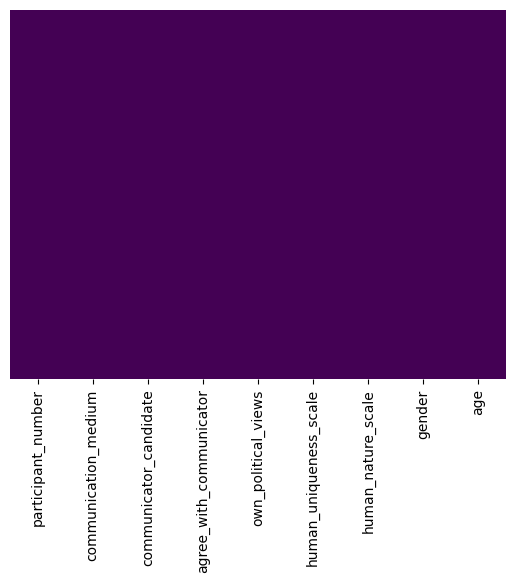

In [26]:
# Checking for nulls in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The dataset is complete and contains no nulls.

Checking for the the correlation of variables in the dataset

<AxesSubplot:title={'center':'Correlation Heatmap for every variable'}>

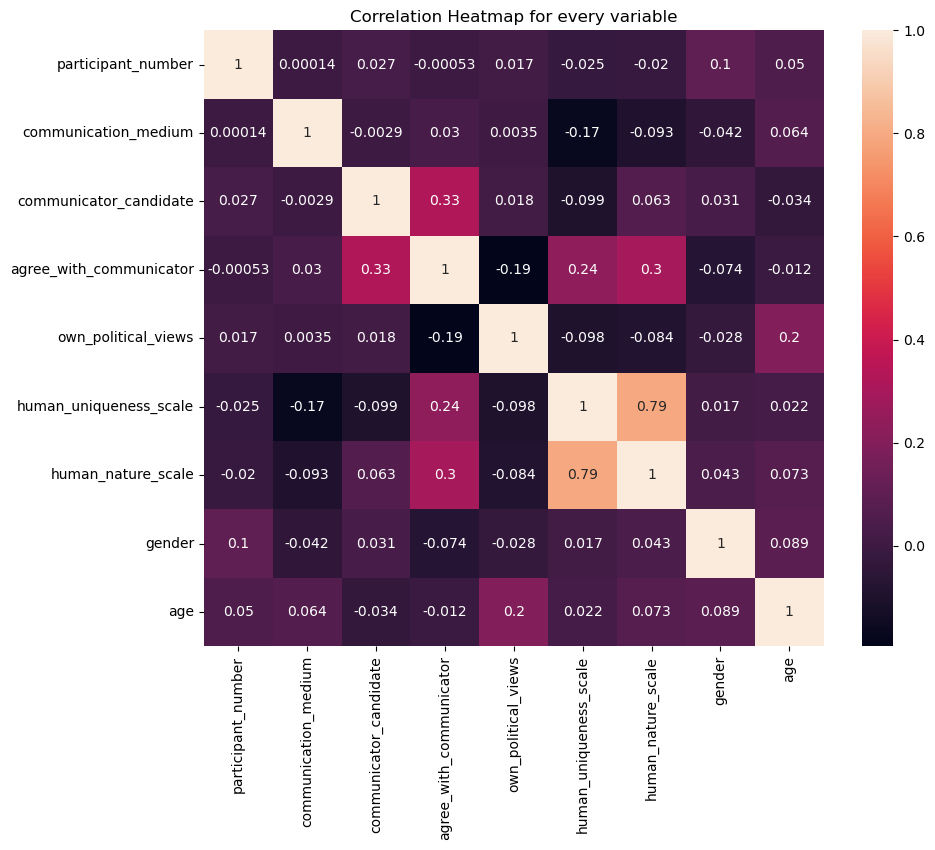

In [28]:
# Plotting the correlation matrix 
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap for every variable')
sns.heatmap(df.corr(), annot = True)

As shown in the correlation map, the human nature and uniqueness scale shows a correlation of 0.3 and 0.24 with the flag agree_with_communicator. This may show a slight possibility of how communicators are rated based on their agreeability with evaluators

Checking for the sample population distribution

<AxesSubplot:title={'center':'Number of participants per gender'}, xlabel='gender', ylabel='count'>

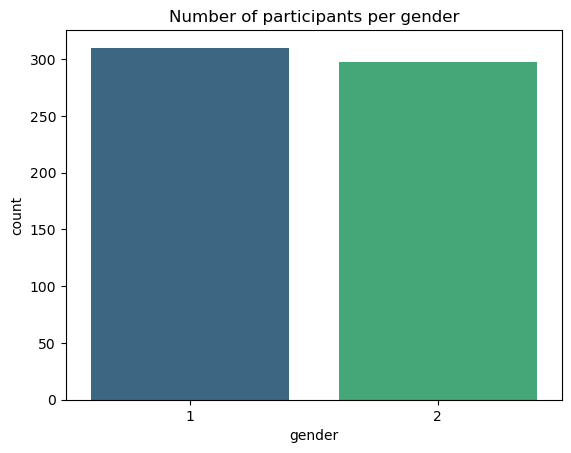

In [29]:
# Checking the gender counts of the sample population
plt.title('Number of participants per gender')
sns.countplot(x='gender', data = df, palette = 'viridis')

There are slightly more male participants than female participants.

Checking for the distribution of the age of the participants

In [30]:
# Checking for the statistical features of the age of the participants
df['age'].describe()

count    607.000000
mean      35.210873
std       11.863985
min        3.000000
25%       26.000000
50%       32.000000
75%       42.000000
max       73.000000
Name: age, dtype: float64

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='age', ylabel='Count'>

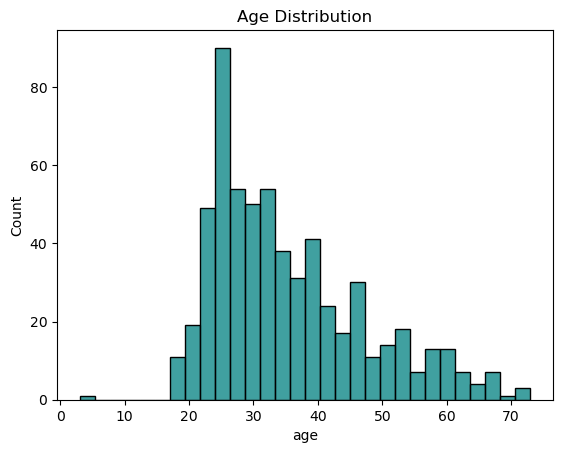

In [31]:
# Plotting the distribution of age
plt.title('Age Distribution')
sns.histplot(df['age'] ,kde=False, color='teal', bins=30)

The age distribution of the participation is quite skewed. The mean age of the participants is 35. A majority of the participants are around the age of 25.

Checking for the distribution of preferred candidates

<AxesSubplot:title={'center':'Communicator Candidate Choice Distribution'}, xlabel='communicator_candidate', ylabel='count'>

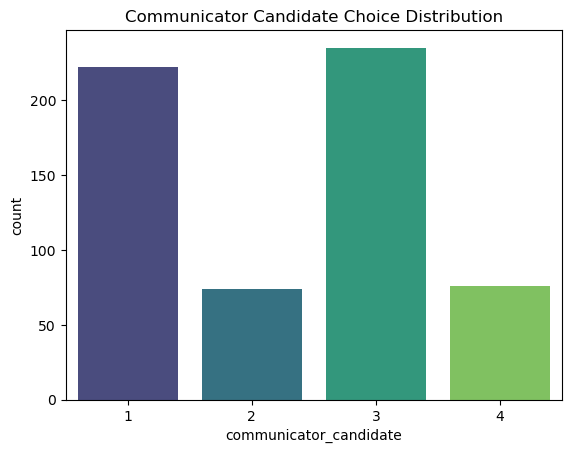

In [32]:
# Plotting the distribution of candidate choice
plt.title('Communicator Candidate Choice Distribution')
sns.countplot(x = 'communicator_candidate', data = df, palette = 'viridis')

A majority of communicators have chosen candidate 3 (Sanders) and 1 (Kasich). It appears that the candidates that have chosen 2 (Trump) and 4 (Clinton) are almost similar in number

Checking the distribution of evaluator's political views

<AxesSubplot:title={'center':'Evaluator Candidate Choice Distribution'}, xlabel='own_political_views', ylabel='count'>

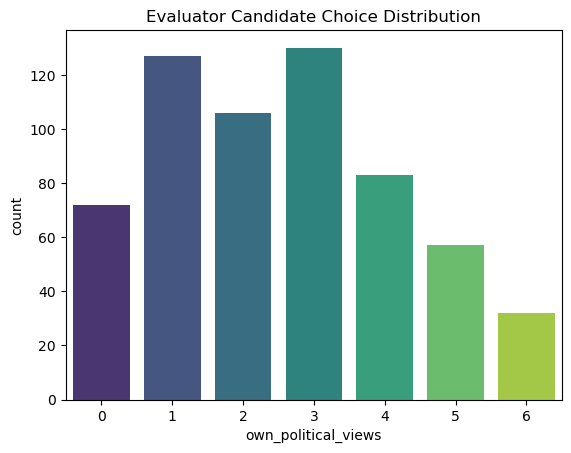

In [33]:
# Plotting the distribution of candidate choice
plt.title('Evaluator Candidate Choice Distribution')
sns.countplot(x = 'own_political_views', data = df, palette = 'viridis')


Checking for the distribution of the humanness and uniqueness scores

ValueError: If using all scalar values, you must pass an index

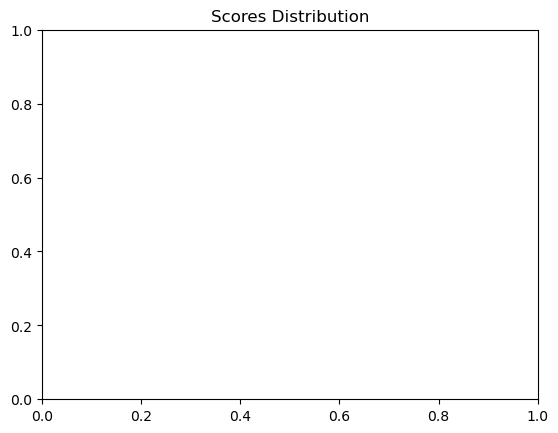

In [34]:
# Plotting the distribution of the scores
plt.title('Scores Distribution')
sns.kdeplot(df[['human_uniqueness_scale', 'human_nature_scale']] , fill=True)

The distributions are not normal. The peak of the human_nature_scale is higher than the peak of the human_uniqueness_scale. 

Checking the interaction between of human_nature_scale on the flag agree_with_communicator. 

In [ ]:
# Bar plot to indicate the interaction between human_nature_scale and agree_with_communicator
plt.title('Human Nature Scale vs. Agree With Communicator')
sns.barplot(x='agree_with_communicator', y= 'human_nature_scale', data = df, palette = 'viridis')

Checking the interaction between human_uniqueness_scale and agree_with_communicator flag

<AxesSubplot:title={'center':'Human Uniqueness Scale vs. Agree With Communicator'}, xlabel='agree_with_communicator', ylabel='human_uniqueness_scale'>

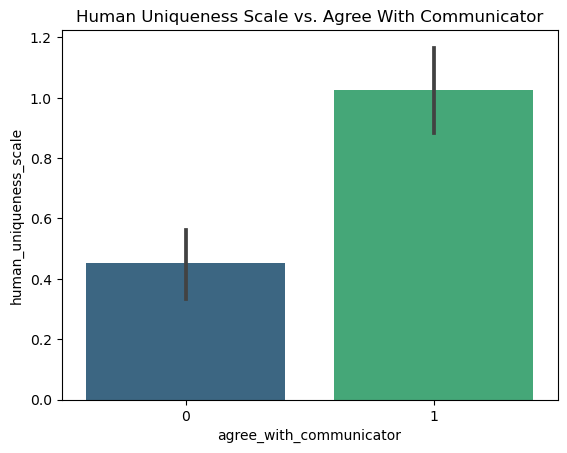

In [35]:
# Bar plot to indicate the interaction between human_uniqueness_scale and agree_with_communicator
plt.title('Human Uniqueness Scale vs. Agree With Communicator')
sns.barplot(x='agree_with_communicator', y= 'human_uniqueness_scale', data = df, palette = 'viridis')

Since we have two columns measuring the scales of humanness and uniqueness, a single composite score for both measurements could help us evaluate the effect of the scores on the agreement among communicators and evaluators.

In [36]:
# Adding a composite score to the dataframe
df['composite_score'] = round((df['human_uniqueness_scale'] + df['human_nature_scale'])/2,2)
df.head()

,participant_number,communication_medium,communicator_candidate,agree_with_communicator,own_political_views,human_uniqueness_scale,human_nature_scale,gender,age,composite_score
0,1,1,3,1,2,1.17,1.17,2,33,1.17
1,2,1,1,0,3,0.00,0.00,2,30,0.00
2,3,3,1,0,0,1.17,-0.50,1,18,0.34
3,4,4,1,0,2,0.33,0.17,1,25,0.25
4,5,4,3,1,2,0.17,-0.17,1,26,0.00


Analysing the effect of composite_score on the communication_medium and agree_with_communicator

<AxesSubplot:title={'center':'Composite score interaction with communication medium'}, xlabel='agree_with_communicator', ylabel='composite_score'>

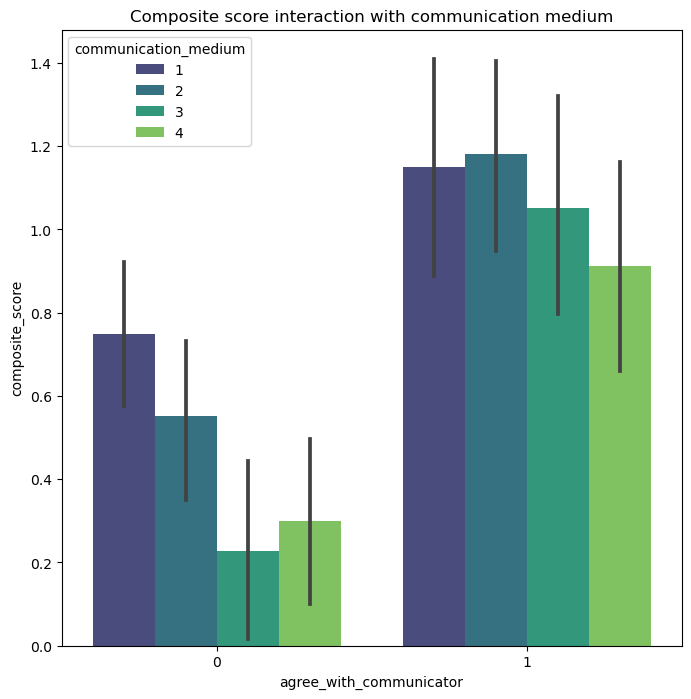

In [37]:
# Checking the effect of communication medium and agree_with_communicator on the composite_score
plt.figure(figsize=(8,8))
plt.title('Composite score interaction with communication medium')
sns.barplot(x='agree_with_communicator', y= 'composite_score', hue='communication_medium', data = df, palette = 'viridis')

* agree_with_communicator 0 = Disagree, 1 = Agree
* communication medium 1 = audiovisual
* communication medium 2 = audio
* communication medium 3 = transcript
* communication medium 4 = written

Based on the above representation we can conclude that the scores have been positively influenced by whether the evaluator agreed with the communicator's political views. 

We can also notice that audiovisual and audio mediums have a significantly higher score because of the involvement of a personal touch. 

---
## Statistical Modeling
---

With the data used in this paper, I intend to use composite_score as a dependent/target variable and agree_with_communicator flag as the independent variable. Although one of the variables is categorical, I am attempting to model this data using a linear model to understand the interaction of these variables on the composite_score. 

In [38]:
# Linear Modeling
f = 'composite_score ~ agree_with_communicator'
linear_model = smf.ols(formula=f, data=df)
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:        composite_score   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     52.06
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.62e-12
Time:                        14:29:15   Log-Likelihood:                -859.86
No. Observations:                 607   AIC:                             1724.
Df Residuals:                     605   BIC:                             1733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

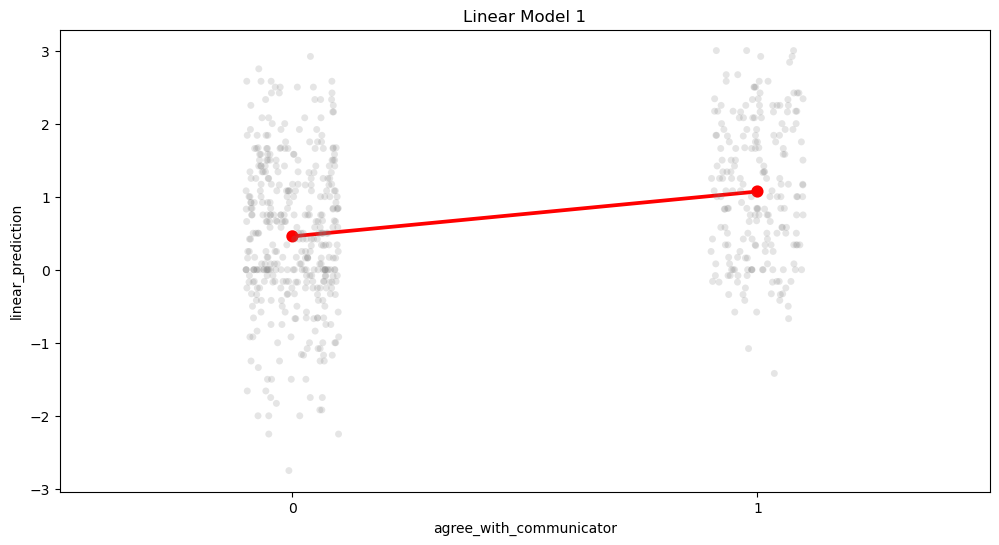

In [39]:
# Plotting the linear predictions
# get the model predictions
df['linear_prediction'] = linear_result.predict()
fig, ax = plt.subplots(figsize=(12,6))
# plot the data
sns.stripplot(data=df, x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=ax)
# plot the best-fit line
sns.pointplot(data=df, x='agree_with_communicator', y='linear_prediction', color='red',  ax=ax)
plt.title('Linear Model 1')
plt.show()

In [40]:
print(linear_result.aic)

1723.723502595784


Based on the AIC score, the model seems to be working slightly well with the variables chosen. To further understand the effect of communication medium, I have added mode of communication to the formula

In [41]:
# Linear Modeling
f = 'composite_score ~ agree_with_communicator + communication_medium'
linear_model = smf.ols(formula=f, data=df)
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:        composite_score   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     34.09
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           9.39e-15
Time:                        14:29:17   Log-Likelihood:                -852.46
No. Observations:                 607   AIC:                             1711.
Df Residuals:                     604   BIC:                             1724.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

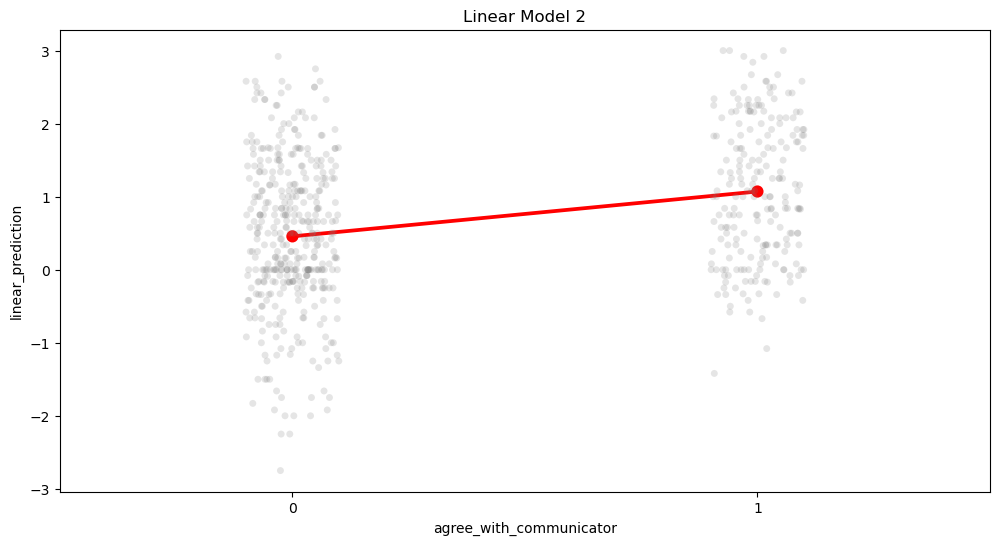

In [42]:
# Plotting the linear predictions
# get the model predictions
df['linear_prediction'] = linear_result.predict()
fig, ax = plt.subplots(figsize=(12,6))
# plot the data
sns.stripplot(data=df, x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=ax)
# plot the best-fit line
sns.pointplot(data=df, x='agree_with_communicator', y='linear_prediction', color='red',  ax=ax)
plt.title('Linear Model 2')
plt.show()

In [22]:
print(linear_result.aic)

1710.9125480347905


The addition of the new variable has reduced the AIC score slightly while indicating the effect of communication mode on the composite_scores. 

---
The model seems to be considering all the data as numeric continuous values rather than categorical variables. Therefore the communication_medium and agree_with_communicator variables can be converted into string categorical variables to evaluate if the model captures the data better

In [23]:
# Converting communication_medium and agree_with_communicator into string values
df['communication_medium'].replace([1,2,3,4],['Audiovisual','Audio','Transcript','Written'], inplace = True)
df['agree_with_communicator'].replace([0,1],['Disagree','Agree'], inplace = True)
df.head()

,participant_number,communication_medium,communicator_candidate,agree_with_communicator,own_political_views,human_uniqueness_scale,human_nature_scale,gender,age,composite_score,linear_prediction
0,1,Audiovisual,3,Agree,2,1.17,1.17,2,33,1.17,1.289753
1,2,Audiovisual,1,Disagree,3,0.00,0.00,2,30,0.00,0.666018
2,3,Transcript,1,Disagree,0,1.17,-0.50,1,18,0.34,0.385247
3,4,Written,1,Disagree,2,0.33,0.17,1,25,0.25,0.244861
4,5,Written,3,Agree,2,0.17,-0.17,1,26,0.00,0.868596


Since the communication medium variable has been converted into string, the model will now be able to represent it as a categorical variable instead of a continuous numeric variable. 

Modeling the updated dataframe we get:

In [24]:
# Linear Modeling
f = 'composite_score ~ agree_with_communicator + communication_medium'
linear_model = smf.ols(formula=f, data=df)
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:        composite_score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     17.47
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.42e-13
Time:                        01:11:03   Log-Likelihood:                -851.59
No. Observations:                 607   AIC:                             1713.
Df Residuals:                     602   BIC:                             1735.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

The above results could be interpreted with agree with communicator and audio communication medium as the baseline. When the mode of communication is audio and the evaluator agrees with the communicator, audio and audiovisual modes have a positive correlation with the composite score, with a p value below 0.05. This means that audio/ audiovisual mode have a significant effect on the composite score. 

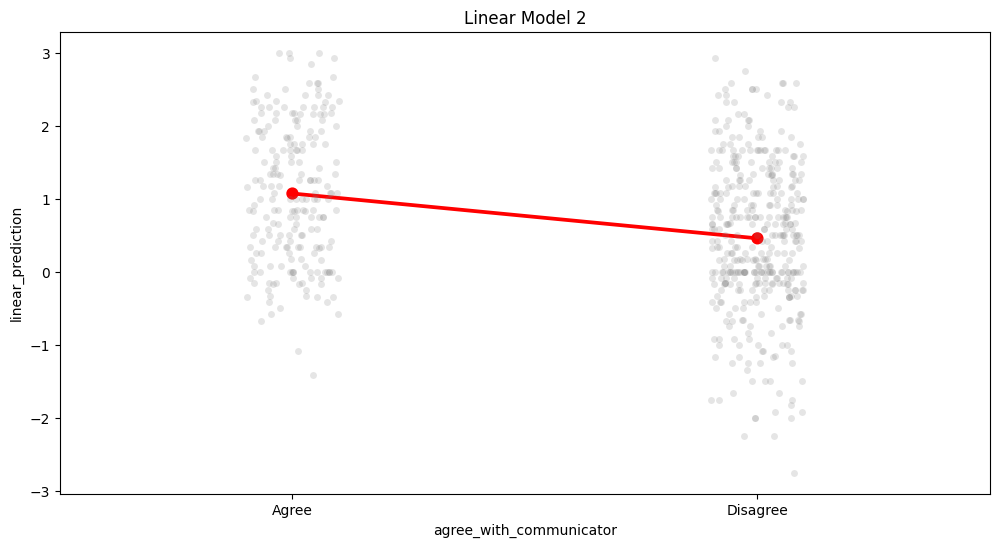

In [25]:
# Plotting the linear predictions
# get the model predictions
df['linear_prediction'] = linear_result.predict()
fig, ax = plt.subplots(figsize=(12,6))
# plot the data
sns.stripplot(data=df, x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=ax)
# plot the best-fit line
sns.pointplot(data=df, x='agree_with_communicator', y='linear_prediction', color='red',  ax=ax)
plt.title('Linear Model 2')
plt.show()

Splitting the visualization based on the different modes of communication can help analyse the predictions for each mode better.

In [26]:
df[df.communication_medium=='Audiovisual']

,participant_number,communication_medium,communicator_candidate,agree_with_communicator,own_political_views,human_uniqueness_scale,human_nature_scale,gender,age,composite_score,linear_prediction
0,1,Audiovisual,3,Agree,2,1.17,1.17,2,33,1.17,1.300592
1,2,Audiovisual,1,Disagree,3,0.00,0.00,2,30,0.00,0.676723
16,17,Audiovisual,4,Disagree,4,-0.17,0.50,2,33,0.16,0.676723
17,18,Audiovisual,1,Disagree,3,1.00,0.50,1,34,0.75,0.676723
18,19,Audiovisual,2,Disagree,4,-1.00,-0.17,2,27,-0.58,0.676723
...,...,...,...,...,...,...,...,...,...,...,...
582,583,Audiovisual,3,Agree,0,0.33,-0.50,1,27,-0.08,1.300592
593,594,Audiovisual,4,Agree,1,1.17,1.17,1,22,1.17,1.300592
601,602,Audiovisual,1,Disagree,1,1.00,1.00,2,57,1.00,0.676723
603,604,Audiovisual,3,Disagree,4,1.50,1.67,2,45,1.58,0.676723


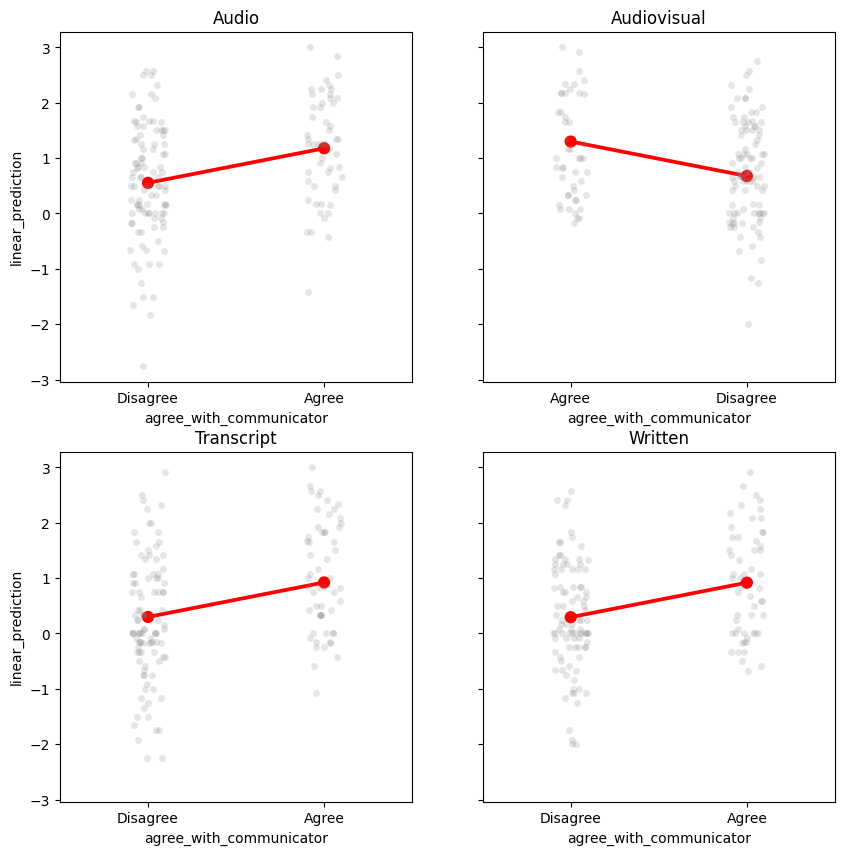

In [29]:
# Plotting the linear predictions

# get the model predictions
df['linear_prediction'] = linear_result.predict()

# Plotting all of the predictions based on the communication medium
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

# plot the data for each communication medium
sns.stripplot(data=df[df.communication_medium == 'Audio'], x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=axes[0,0])
sns.stripplot(data=df[df.communication_medium == 'Audiovisual'], x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=axes[0,1])
sns.stripplot(data=df[df.communication_medium == 'Transcript'], x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=axes[1,0])
sns.stripplot(data=df[df.communication_medium == 'Written'], x='agree_with_communicator', y='composite_score', color='gray', alpha=.2, ax=axes[1,1])

# plot the best-fit line for each communication medium
sns.pointplot(data=df[df.communication_medium == 'Audio'], x='agree_with_communicator', y='linear_prediction', color='red',  ax=axes[0,0])
sns.pointplot(data=df[df.communication_medium == 'Audiovisual'], x='agree_with_communicator', y='linear_prediction', color='red',  ax=axes[0,1])
sns.pointplot(data=df[df.communication_medium == 'Transcript'], x='agree_with_communicator', y='linear_prediction', color='red',  ax=axes[1,0])
sns.pointplot(data=df[df.communication_medium == 'Written'], x='agree_with_communicator', y='linear_prediction', color='red',  ax=axes[1,1])

# Setting title for each of the subplots
axes[0,0].set_title('Audio')
axes[0,1].set_title('Audiovisual')
axes[1,0].set_title('Transcript')
axes[1,1].set_title('Written')

plt.show()

In [30]:
print(linear_result.aic)

1713.1739156899955


While comparing the metrics of the previous model to the current model, we see that we have an increased r-squared value which indicates that our model is capturing our data better. The AIC score has remained almost consistent from the previous model. 